In [1]:
%matplotlib inline
import model
import networkx as nx
import pandas as pd
import numpy as np
import copy
import multiprocessing
from itertools import combinations
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams["font.size"] = 10
plt.rcParams["lines.markersize"] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['grid.alpha'] = .5
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.major.width'] = .5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = .5
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 10
#plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.framealpha'] =.7
#plt.rcParams['legend.title_fontsize'] = 8

# Faction count and prominence

Couldn't work out how to get the order of clusters from the dendrogram, so you have to enter the order by hand, comparing with the linkage matrix.

/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0.5, 1.0, '5 peaks, 0.199 mean prominence')

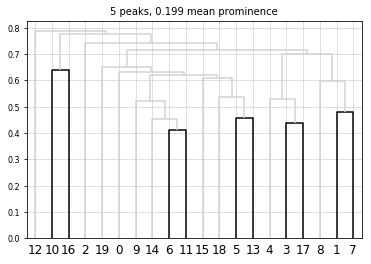

In [5]:
g, beliefs = model.setup(n_agents=20)
model.simulate_simultaneous(g, beliefs)
jaccards = model.measure_interpersonal_similarity(g)


method='average'
distances = 1-np.array(list(jaccards.values()))
link = sch.linkage(distances, method=method)
peaks = np.argwhere(link[:,3]==2).flatten()

if len(peaks) > 1:
    sf = squareform(sch.cophenet(link))
    prominences = []
    for node, height in link[peaks,1:3]:
        distances = []
        for othernode in link[peaks,1]:
            if node == othernode:
                continue
            distance = sf[int(node), int(othernode)]
            distances.append(distance)
        prominences.append(min(distances)-height)
    mean_prominence = np.mean(prominences)  
else:
    mean_prominence = 0

def color(k):
    if k in set(np.array(peaks)+len(link)+1):
        return 'k'
    else:
        return 'lightgrey'    
    
R = sch.dendrogram(link,
              link_color_func=color);
plt.grid('on')
plt.title('%i peaks, %.03f mean prominence'%(len(peaks), mean_prominence)) 

pd.to_pickle([link, peaks, prominences, color,])

In [62]:
pd.to_pickle([link, peaks, prominences, color], 'dendrogram_points.pickle')

In [7]:
link[peaks], prominences

(array([[ 6.        , 11.        ,  0.41116751,  2.        ],
        [ 3.        , 17.        ,  0.43870968,  2.        ],
        [ 5.        , 13.        ,  0.45673077,  2.        ],
        [ 1.        ,  7.        ,  0.48087432,  2.        ],
        [10.        , 16.        ,  0.64166667,  2.        ]]),
 [0.2106696277440787,
  0.2638124963338292,
  0.16510637120366478,
  0.22164785681329335,
  0.13391076527127332])

/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


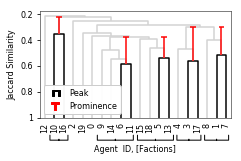

In [107]:
plt.figure(figsize=(8.7*0.393701, 5*0.393701))


R = sch.dendrogram(link,
              link_color_func=color, leaf_font_size=8);
indices = (np.array(R['dcoord'])[:,0] == 0) & (np.array(R['dcoord'])[:,3] == 0)
xs = np.array(R['icoord'])[indices].mean(axis=1)
y1s = np.array(R['dcoord'])[indices].max(axis=1)
################ do this by hand ##################
# need to identify the order that the prominences should come in - ie, look
# at the dendrogram names, then write the order that the peaks come in from
# left to right
y2s = np.array(prominences)[[4,0,2,1,3]]  
plt.vlines(xs, y1s, y1s+y2s, 'r')
plt.hlines(y1s+y2s, xs-3, xs+3, 'r')


dummies = plt.plot([], [], ls='-', c='k', linewidth=0, marker='$┏┓$', markersize=10) + \
          plt.plot([], [], ls='-', c='r', linewidth=0, marker='$┳$', markersize=8)
labels = ['Peak', 'Prominence']
plt.legend(dummies, labels, 
           framealpha=.97, fancybox=True, 
           fontsize=8, loc='lower left')

plt.annotate(' ', xy=(2/20, -.23),
             xytext=(2/20, -.23),
             xycoords='axes fraction',
             ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-[, widthB=.9, lengthB=-.5', lw=1.0))

plt.annotate(' ', xy=(7.9/20, -.23),
             xytext=(7.9/20, -.23),
             xycoords='axes fraction',
             ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-[, widthB=1.8, lengthB=-.5', lw=1.0))

plt.annotate(' ', xy=(12.1/20, -.23),
             xytext=(12.1/20, -.23),
             xycoords='axes fraction',
             ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-[, widthB=1.8, lengthB=-.5', lw=1.0))

plt.annotate(' ', xy=(15.6/20, -.23),
             xytext=(15.6/20, -.23),
             xycoords='axes fraction',
             ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=-.5', lw=1.0))

plt.annotate(' ', xy=(18.5/20, -.23),
             xytext=(18.5/20, -.23),
             xycoords='axes fraction',
             ha='center', va='bottom',
             arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=-.5', lw=1.0))

plt.annotate('Agent  ID, [Factions]', xy=(.5, -.32),
             ha='center',
             xycoords='axes fraction', fontsize=8)

plt.setp(plt.gca().spines.values(), linewidth=.5)
plt.ylabel('Jaccard Similarity')
plt.xticks(rotation=90)
#plt.xlabel('Agent')
#plt.title('Number and Prominence of Factions');
plt.grid('off')
plt.yticks([0, .2, .4, .6, .8], [1, .8, .6, .4, .2])
plt.savefig('fig06 faction count and prominence.svg')
plt.savefig('fig06 faction count and prominence.png', 
            bbox_inches='tight', dpi=300)

# choice of belief clustering value

In [74]:
def point(i):
    g, beliefs = model.setup(n_agents=40)
    model.simulate_simultaneous(g, beliefs)
    
    diffusion = model.measure_diffusion(g, beliefs)
    clustering = [model.measure_belief_clustering_coefficient(diffusion, q) for q in range(100)]
    return clustering

with multiprocessing.Pool() as p:
    res = p.map(point, range(1000))

In [75]:
def point2(i):
    g, beliefs = model.setup(n_agents=40)
    model.simulate_individual(g, beliefs)
    
    diffusion = model.measure_diffusion(g, beliefs)
    clustering = [model.measure_belief_clustering_coefficient(diffusion, q) for q in range(100)]
    return clustering

with multiprocessing.Pool() as p:
    res2 = p.map(point2, range(1000))

In [77]:
pd.to_pickle([res, res2], 'top_n_clustering_points.pickle')

In [10]:
[res, res2] = pd.read_pickle('top_n_clustering_points.pickle')

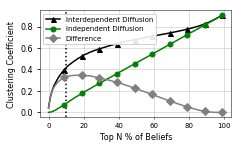

In [12]:
plt.figure(figsize=(8.7*0.393701, 5*0.393701))

plt.plot(list(reversed(range(100))), np.array(res).mean(axis=0), 
         '-^k', markevery=10, markersize=5,
         label='Interdependent Diffusion')
plt.plot(list(reversed(range(100))), np.array(res2).mean(axis=0), 
         '-go', markevery=10, markersize=5,
         label='Independent Diffusion')
plt.plot(list(reversed(range(100))), np.array(res).mean(axis=0) - np.array(res2).mean(axis=0),
         '-D', color='grey', markevery=10, markersize=5,
         label='Difference')
ylim = plt.gca().get_ylim()
#plt.vlines(10, *ylim, linestyles=':', label='Top 10% Measurement')
plt.vlines(10, *ylim, linestyles=':')
plt.xlabel('Top N % of Beliefs')
plt.ylabel('Clustering Coefficient')
plt.ylim(ylim)
plt.setp(plt.gca().spines.values(), linewidth=.5)
plt.legend(framealpha=.9, fancybox=True, loc='upper left');

plt.savefig('fig04 belief clustering threshold.svg')
plt.savefig('fig04 belief clustering threshold.png', 
            bbox_inches='tight', dpi=300)

# Choice of jaccard similarity threshold

In [4]:
def point4(i):
    g, beliefs = model.setup()
    i_jaccards = model.measure_interpersonal_similarity(g)
        
    model.simulate_simultaneous(g, beliefs)
    g_random = model.randomize_beliefs(g)
    jaccards = model.measure_interpersonal_similarity(g)
    r_jaccards = model.measure_interpersonal_similarity(g_random)
    
    initial_similarity = [model.measure_mean_interpersonal_similarity(i_jaccards, q) for q in range(100)]
    ag_cas_similarity = [model.measure_mean_interpersonal_similarity(jaccards, q) for q in range(100)]
    chance_similarity = [model.measure_mean_interpersonal_similarity(r_jaccards, q) for q in range(100)]
    
    b_initial_similarity = [model.measure_mean_interpersonal_similarity(i_jaccards, q, above=False) 
                            for q in reversed(range(100))]
    b_ag_cas_similarity = [model.measure_mean_interpersonal_similarity(jaccards, q, above=False) 
                           for q in reversed(range(100))]
    b_chance_similarity = [model.measure_mean_interpersonal_similarity(r_jaccards, q, above=False) 
                           for q in reversed(range(100))]

        
    return (initial_similarity, ag_cas_similarity, chance_similarity,
            b_initial_similarity, b_ag_cas_similarity, b_chance_similarity)
 

with multiprocessing.Pool() as p:
    res4 = p.map(point4, range(1000))
    
(initial_similarity, ag_cas_similarity, chance_similarity,
 b_initial_similarity, b_ag_cas_similarity, b_chance_similarity) = zip(*res4) 

/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Use

In [5]:
pd.to_pickle([res4], 'jaccard_threshold_points.pickle')

In [3]:
res4 = pd.read_pickle('jaccard_threshold_points.pickle')

FileNotFoundError: [Errno 2] No such file or directory: 'jaccard_threshold_points.pickle'

In [6]:
(initial_similarity, ag_cas_similarity, chance_similarity,
 b_initial_similarity, b_ag_cas_similarity, b_chance_similarity) = zip(*res4) 

/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


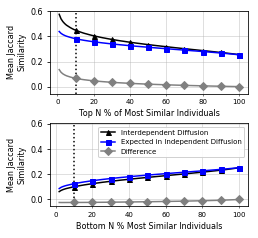

In [9]:
plt.figure(figsize=(8.7*0.393701, 8*0.393701))

ax1 = plt.subplot(2,1,1)
n_comparisons = len(initial_similarity[0])
xs = np.arange(n_comparisons)/n_comparisons * 100
#plt.plot(100-xs, np.array(initial_similarity).mean(axis=0),
#          '-*c', markevery=10, label='Initial Condition')
plt.plot(100-xs, np.array(ag_cas_similarity).mean(axis=0), 
         '-k^', markevery=10, label='Interdependent Diffusion',
        markersize=5)
plt.plot(100-xs, np.array(chance_similarity).mean(axis=0), 
         '-bs', markevery=10, label='Expected in Independent Diffusion',
        markersize=5)
plt.plot(100-xs, np.array(ag_cas_similarity).mean(axis=0) - np.array(chance_similarity).mean(axis=0), 
         '-D', color='grey', markevery=10, label='Difference',
        markersize=5)

plt.xlabel('Top N % of Most Similar Individuals')
plt.ylabel('Mean Jaccard\nSimilarity')
plt.grid('on')
ylim = ax1.get_ylim()
ax1.vlines([], [], [], linestyles=':', label='Top 10% Measurement') #dummy
#plt.legend(framealpha=.9, fancybox=True, loc='upper right');


ax2 = plt.subplot(2,1,2, sharey=ax1)
n_comparisons = len(initial_similarity[0])
xs = np.arange(n_comparisons)/n_comparisons * 100
#plt.plot(100-xs, np.array(b_initial_similarity).mean(axis=0),
#          '-*c', markevery=10, label='Initial Condition')
plt.plot(100-xs, np.array(b_ag_cas_similarity).mean(axis=0), 
         '-k^', markevery=10, label='Interdependent Diffusion',
        markersize=5)
plt.plot(100-xs, np.array(b_chance_similarity).mean(axis=0), 
         '-bs', markevery=10, label='Expected in Independent Diffusion',
        markersize=5)
plt.plot(100-xs, np.array(b_ag_cas_similarity).mean(axis=0) - np.array(b_chance_similarity).mean(axis=0), 
         '-D', color='grey', markevery=10, label='Difference',
        markersize=5)

plt.xlabel('Bottom N % Most Similar Individuals')
plt.ylabel('Mean Jaccard\nSimilarity')
plt.grid('on')
ylim = ax2.get_ylim()
#plt.vlines(10, *ylim, linestyles=':', label='Bottom 10% Measurement')
plt.vlines(10, *ylim, linestyles=':')
plt.ylim(ylim)
plt.legend(framealpha=.9, fancybox=True, loc='upper right');

# go back and add the dashed line once we know the ylims
ax1.vlines(10, *ylim, linestyles=':', label='Top 10% Measurement')
plt.tight_layout(pad=.15)
plt.savefig('fig05 jaccard similarity threshold.svg')
plt.savefig('fig05 jaccard similarity threshold.png', 
            bbox_inches='tight', dpi=300);